In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


 **1]. DATA ANALYSIS AND CLEANING**

In [21]:
df=pd.read_csv('C:/Users/niket/Downloads/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
catogaryColumn = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuesColumn = ["age","trtbps","chol","thalachh","oldpeak"]

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[continuesColumn] = scaler.fit_transform(df[continuesColumn]) #only normalize continus data 

In [24]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [25]:
x=df.drop(columns="output")
y=df["output"]

**2]. DATA VISUALIZATION AND FEATURES COMPARISION**

C:\Users\niket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


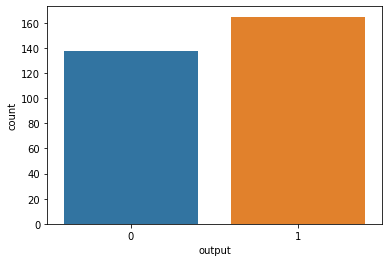

In [26]:
from itertools import cycle

import seaborn as sns
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(y)
plt.show()

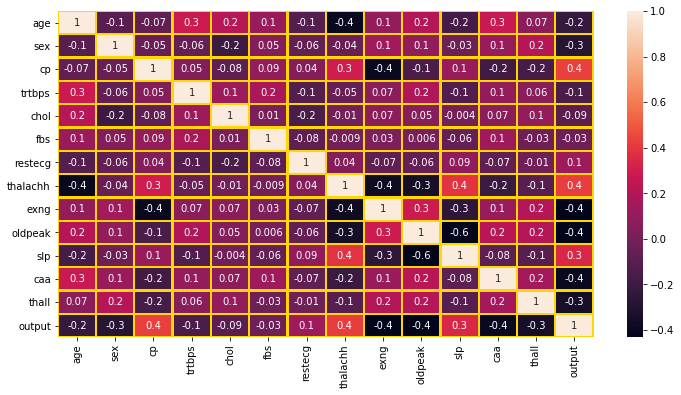

In [27]:
plt.figure(figsize =(12,6))
sns.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor='gold',annot=True);

C:\Users\niket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


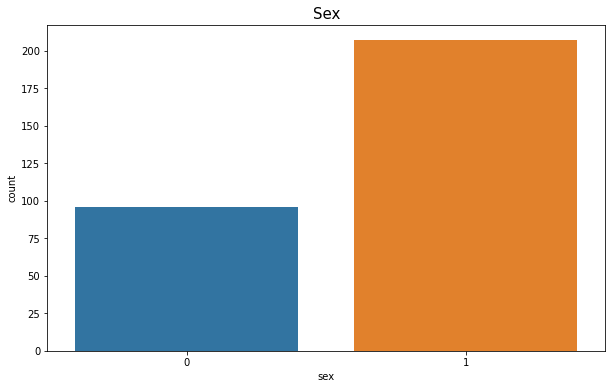

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(df["sex"])
plt.title("Sex", size=15)
plt.show()

C:\Users\niket\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


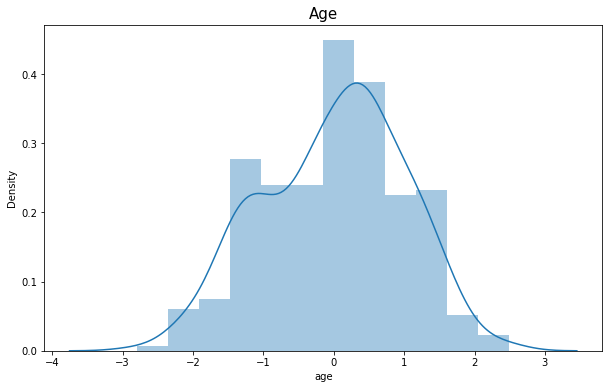

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(df["age"])
plt.title("Age", size=15)
plt.show()

C:\Users\niket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


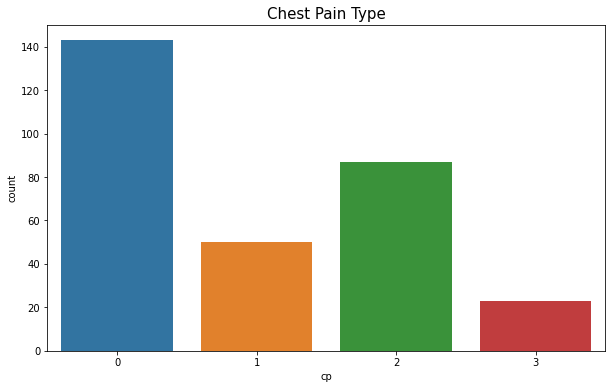

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(df["cp"])
plt.title("Chest Pain Type", size=15)
plt.show()

C:\Users\niket\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\niket\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


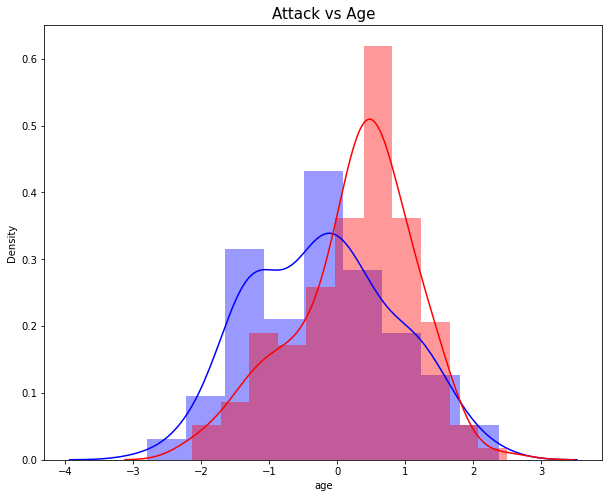

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(df[df["output"]==1]["age"], color="blue")
sns.distplot(df[df["output"]==0]["age"], color="red")
plt.title("Attack vs Age", size=15)
plt.show()

**3]. A) Machine learning model (SVM)**

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

In [33]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [34]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)


0.9016393442622951

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



**B) Machine learning model (LogisticRegression)**

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3


In [39]:
y_pred_lr = lr.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred_lr)

0.9180327868852459

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



In [42]:
X_c = np.c_[np.ones((x.shape[0], 1)), x]
y_c = y[:, np.newaxis]
theta = np.zeros((X_c.shape[1], 1))

<ipython-input-42-9ea3562d15a2>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_c = y[:, np.newaxis]


In [43]:
theta.shape

(14, 1)

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

In [45]:
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost


In [52]:
cost_function(theta,X_c,y_c)

0.6931471805599453

# C) Machine learning model (KNN)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("KNeighborsClassifier: ", score)

KNeighborsClassifier:  0.8524590163934426


In [58]:
score_list=[]

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    predictions = knn2.predict(X_test)
    score_list.append(accuracy_score(predictions, y_test))

Text(0, 0.5, 'Score')

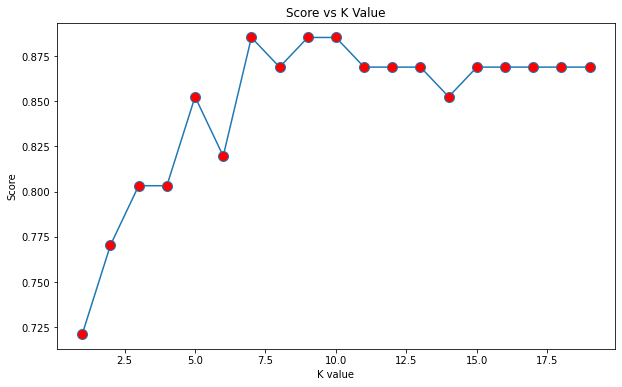

In [59]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 20), score_list, marker ='o', markerfacecolor ='red', markersize = 10)
  
plt.title('Score vs K Value',)
plt.xlabel('K value')
plt.ylabel('Score')

In [60]:
knn3 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(X_train, y_train)
predictions = knn3.predict(X_test)
score = accuracy_score(y_test, predictions)
print("KNeighborsClassifier: ", score)

KNeighborsClassifier:  0.8852459016393442


# D)Naive Bayes Algorithm

In [70]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
score = accuracy_score(y_test, predictions)
print("GaussianNB: ", score)

new_row = {"Model": "GaussianNB", "Accuracy Score": score}


GaussianNB:  0.8360655737704918
